In [1]:
import pandas as pd
import sys

recommenders_path = 'Recommenders'
sys.path.append(recommenders_path)

graphs_path = 'Graphs'
sys.path.append(graphs_path)

spotify_path = 'Spotify'
sys.path.append(spotify_path)

graphics_path = 'Graphics'
sys.path.append(graphics_path)

from Recommenders.StrongerConnectionsRecommender import StrongerConnectionsRecommender
from Graphs.SimpleGraph import SimpleGraph
from Graphics.Graphics import Graphics

In [2]:
df = pd.read_csv('../data/spotify_artists.csv') # without popularity filter
df

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
20486,https://open.spotify.com/artist/3xx17YXYvPl9PB...,56415,"contemporary vocal jazz, ectofolk, folk, lilith",3xx17YXYvPl9PBx6Jzalk4,Shelby Lynne,48,spotify:artist:3xx17YXYvPl9PBx6Jzalk4
20487,https://open.spotify.com/artist/3jvWpZJpokYCoT...,35290,"alternative emo, emo, midwest emo",3jvWpZJpokYCoT0QV4OJg0,You Blew It!,33,spotify:artist:3jvWpZJpokYCoT0QV4OJg0
20488,https://open.spotify.com/artist/53HxKgLPRmkmUq...,72,NaN,53HxKgLPRmkmUqzOv7qVL3,Z,0,spotify:artist:53HxKgLPRmkmUqzOv7qVL3
20489,https://open.spotify.com/artist/0SYlWdOsemdRbG...,0,NaN,0SYlWdOsemdRbGNNU6FF3h,Z,0,spotify:artist:0SYlWdOsemdRbGNNU6FF3h


In [3]:
df = df.dropna(subset=['genres'])
df.reset_index(drop=True, inplace=True)
df

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
14999,https://open.spotify.com/artist/1NrqtKwAa1VXMW...,103432,rap kreyol,1NrqtKwAa1VXMWxREFlPPB,Wendyyy,39,spotify:artist:1NrqtKwAa1VXMWxREFlPPB
15000,https://open.spotify.com/artist/2x49HGCVPqbRxe...,76890,indonesian lo-fi pop,2x49HGCVPqbRxecj0PZq2R,Yahya,49,spotify:artist:2x49HGCVPqbRxecj0PZq2R
15001,https://open.spotify.com/artist/3xx17YXYvPl9PB...,56415,"contemporary vocal jazz, ectofolk, folk, lilith",3xx17YXYvPl9PBx6Jzalk4,Shelby Lynne,48,spotify:artist:3xx17YXYvPl9PBx6Jzalk4
15002,https://open.spotify.com/artist/3jvWpZJpokYCoT...,35290,"alternative emo, emo, midwest emo",3jvWpZJpokYCoT0QV4OJg0,You Blew It!,33,spotify:artist:3jvWpZJpokYCoT0QV4OJg0


In [4]:
artists_ids = {}
for i in range(len(df)):
    artists_ids[df['id'][i]] = df['name'][i]

In [5]:
genres = {}
for index in range(len(df)):
    for genre_artist in df['genres'][index].split(', '):
        if genre_artist not in genres: genres[genre_artist] = []
        genres[genre_artist].append(df['id'][index])

dict_items([('british soul', ['4dpARuHxo51G3z768sgnrY', '6Q192DXotxtaysaqNPy5yR', '37NqXwtb6nIEqRt4EJSoIO', '29WzbAQtDnBJF09es0uddn', '2JyWXPbkqI5ZJa3gwqVa0c', '49HlOY4gkHqsYG9GCuhkcc', '2RhMHmV21ZDcSGZ872U4ZY', '0un6YenPxWZ2VW4aFGMupM', '4fwuXg6XQHfdlOdmw36OHa', '2hwy5DELim1AxB1sHPqn4y', '7rftfGIYEeZ79sLb58ZBDi', '6b5YOgXIliAozdo49vUCJQ', '5Mq7iqCWBzofK39FBqblNc', '7bvcQXJHkFiN1ppIN3q4fi', '0bzfPKdbXL5ezYW2z3UGQj', '5lKZWd6HiSCLfnDGrq9RAm', '2RP4pPHTXlQpDnO9LvR7Yt', '6V3F8MZrOKdT9fU686ybE9', '7x5rK9BClDQ8wmCkYAGsQp', '1pf3joSSGlPRxmUoWSsh1W', '47zz7sob9NUcODy0BTDvKx', '1fa0cOhromAZdq2xRA4vv8', '5GtMEZEeFFsuHY8ad4kOxv', '2jS7I1u7BpgWT9ssG62Zr1']), ('pop', ['4dpARuHxo51G3z768sgnrY', '66CXWjxzNUsdJxJ2JdwvnR', '06HL4z0CvFAxyc27GXpf02', '26VFTg2z8YR0cCuwLzESi2', '0p4nmQO2msCgU4IF37Wi3j', '3DiDSECUqqY1AuBP8qtaIa', '1vCWHaC5f2uS3yhpwWbIA6', '6eUKZXaKkcviH0Ku9w2n3V', '07YZf4WDAMNwqr4jfgOZ8y', '4npEfmQ6YuiwW1GpUmaq3F', '1l7ZsJRRS8wlW3WfJfPfNS', '23zg3TcAtWQy7J6upgbUnj', '5IH6FPUwQTxPSXurCrcIov

In [29]:
genres_sorted = sorted(genres.items(), key=lambda x: len(x[1]), reverse = True)

In [32]:
for genero, tamanho in genres_sorted:
    print(genero, len(tamanho))

rock 249
norteno 224
pop 212
musica mexicana 210
soft rock 208
urbano latino 199
classic rock 189
corrido 184
pov: indie 175
r&b 173
white noise 173
alternative metal 172
album rock 172
rap 170
filmi 170
trap 168
singer-songwriter 166
hard rock 160
trap latino 158
country 157
reggaeton 154
mellow gold 154
hip hop 153
dance pop 152
contemporary country 149
pop dance 147
alt z 144
latin pop 142
urban contemporary 140
modern rock 137
banda 137
country road 136
movie tunes 136
ccm 136
alternative rock 135
post-grunge 134
southern hip hop 132
modern bollywood 131
new wave pop 131
indie rock 131
edm 130
sierreno 129
k-pop 128
pop rap 126
rain 124
alternative r&b 122
indietronica 122
nu metal 119
color noise 117
soul 116
electro house 111
dirty south rap 111
contemporary r&b 110
country rock 108
pop punk 107
singer-songwriter pop 103
permanent wave 101
pop rock 101
modern country pop 101
folk rock 98
metalcore 97
new romantic 97
sleep 95
worship 93
calming instrumental 93
atl hip hop 92
art p

In [20]:
for genre in genres:
    print(genre, len(genres[genre]))

british soul 24
pop 212
pop soul 22
uk pop 57
east coast hip hop 79
hip hop 153
rap 170
garage rock 28
modern rock 137
permanent wave 101
rock 249
sheffield indie 5
alternative metal 172
alternative rock 135
grunge 38
hard rock 160
nu metal 119
reggaeton 154
reggaeton flow 55
trap boricua 11
trap latino 158
urbano latino 199
europop 35
swedish pop 22
pov: indie 175
australian rock 9
philly indie 14
slacker rock 18
melodic rap 63
trap 168
electropop 57
etherpop 10
indie poptimism 40
social media pop 18
bachata 23
latin hip hop 37
latin pop 142
bachata dominicana 16
tropical 50
atl hip hop 92
dance pop 152
filmi 170
modern bollywood 131
k-pop 128
k-pop boy group 41
escape room 48
indie soul 61
neo soul 59
canadian pop 37
candy pop 18
countrygaze 21
indie pop 76
small room 20
metalcore 97
neon pop punk 59
pop punk 107
screamo 45
k-pop girl group 35
r&b 173
atl trap 23
gangster rap 62
edm 130
pop dance 147
afrobeats 66
nigerian pop 52
canadian singer-songwriter 17
lilith 43
neo mellow 69
p

In [6]:
connections = []
for genre in genres:
    if len(genres[genre]) == 1: continue
    for i in range(len(genres[genre])):
        for j in range(i+1, len(genres[genre])):
           artist_1, artist_2 = (genres[genre][i], genres[genre][j]) if genres[genre][i] < genres[genre][j] else (genres[genre][j], genres[genre][i])
           connections.append((artist_1, artist_2))

In [7]:
from collections import Counter
counter = Counter(connections)
edges = []
for artists, weight in counter.items():
    artist_1, artist_2 = artists
    edges.append((artist_1, artist_2, weight))

In [8]:
G = SimpleGraph()
artists_nodes = [(df['id'][index], dict(popularity=int(df['popularity'][index]), name=str(df['name'][index]))) for index in range(len(df['id']))]
G.add_nodes(artists_nodes)
G.add_edges(edges)
name_network = 'stronger_connections_recommender'

## **Analisando a rede**

### **Informações báiscas**

In [9]:
print(f'Quantidade de vértices: {G.get_number_of_nodes()}')
print(f'Quantidade de arestas: {G.get_number_of_edges()}')
print(f'Quantidade de componentes: {G.get_number_connected_components()}')
print(f'Menor grau da rede: {G.get_minimum_degree()}')
print(f'Maior grau da rede: {G.get_maximum_degree()}')
print(f'Grau médio da rede: {G.get_average_degree()}')
print(f'Densidade da rede: {G.get_density()}')
#print(f'Distância média: {G.average_shortest_path_length()}')
#average_clustering_coefficient, percentage_of_considered_nodes = G.get_average_clustering_coefficient()
#print(f'Coeficiente de clustering médio: {average_clustering_coefficient} (apenas {percentage_of_considered_nodes:.2%} da rede foi considerada no cálculo, que que possuem grau maior do que um)')

Quantidade de vértices: 15004
Quantidade de arestas: 774139
Quantidade de componentes: 347
Menor grau da rede: 0
Maior grau da rede: 768
Grau médio da rede: 103.1910157291389
Densidade da rede: 0.006878025443520556


### **Distribuição de graus**

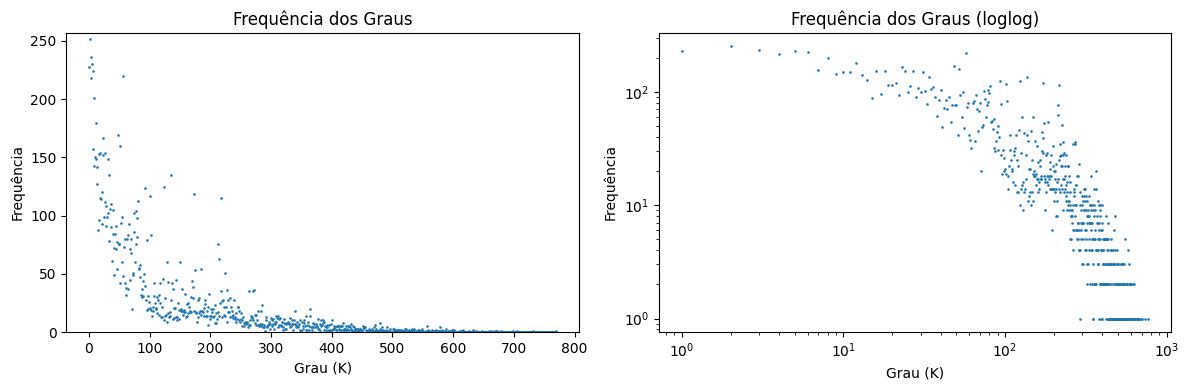

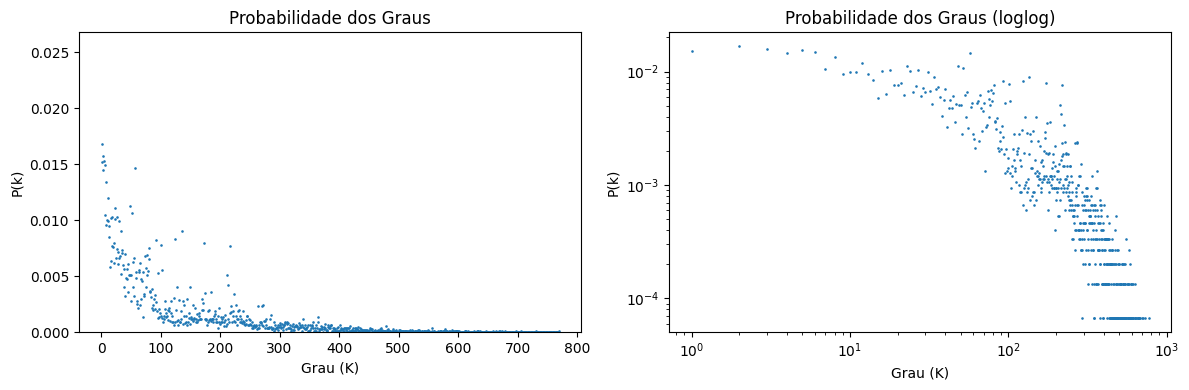

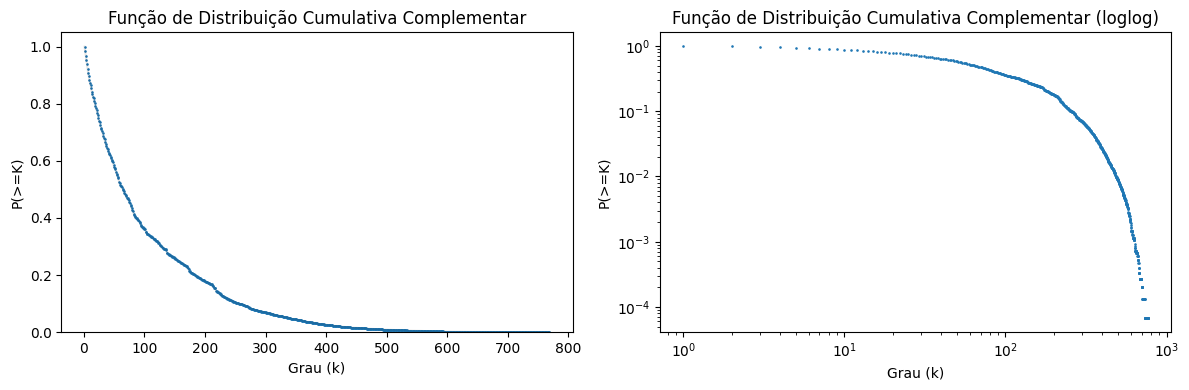

In [12]:
frequencies_of_degrees, probability_of_degrees, accumulated_probability_of_degress = G.get_degree_distribution()
Graphics.create_graphic_degrees(data = frequencies_of_degrees, xLabel = 'Grau (K)', yLabel = 'Frequência', title = 'Frequência dos Graus', limit = 5, lines = False, name_network = name_network)
Graphics.create_graphic_degrees(data = probability_of_degrees, xLabel = 'Grau (K)', yLabel = 'P(k)', title = 'Probabilidade dos Graus', limit = 0.01, lines = False,  name_network = name_network)
Graphics.create_graphic_degrees(data = accumulated_probability_of_degress, xLabel = 'Grau (k)', yLabel = 'P(>=K)', title = 'Função de Distribuição Cumulativa Complementar', limit = 0.05, lines = True,  name_network = name_network)

### **Centralidades**

#### **Centralidade por Grau**

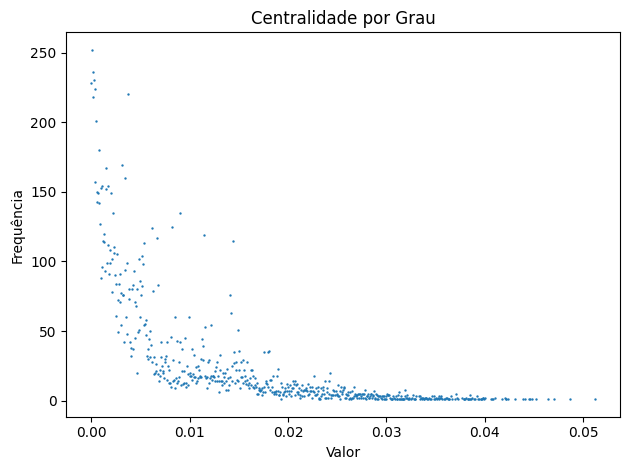

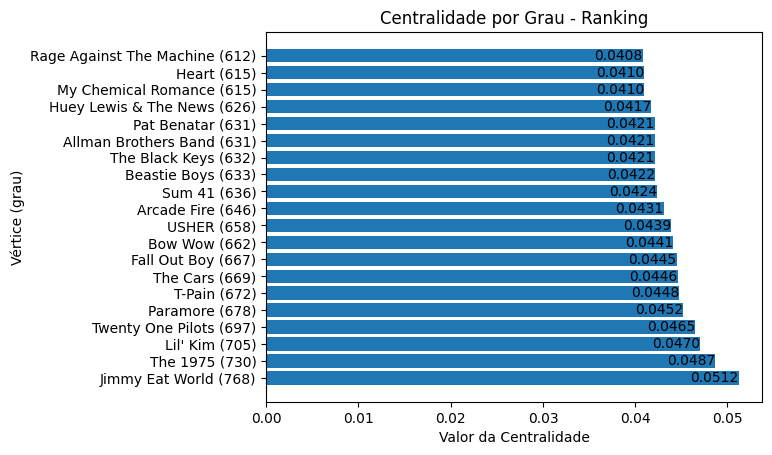

In [16]:
degree_centrality=G.get_degree_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title='Centralidade por Grau', name_network=name_network)
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G, title='Centralidade por Grau - Ranking', name_network=name_network)

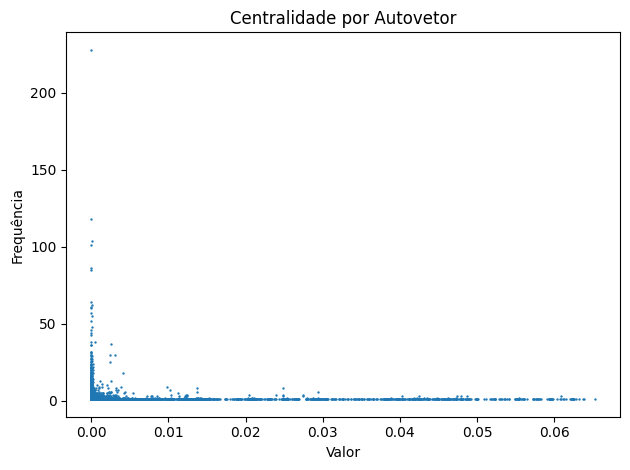

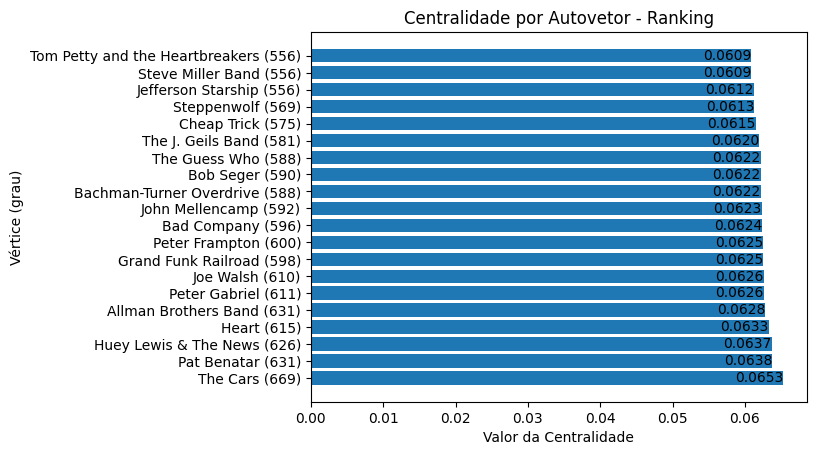

In [15]:
eigenvector_centrality=G.get_eigenvector_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title='Centralidade por Autovetor', name_network=name_network)
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G, title='Centralidade por Autovetor - Ranking', name_network=name_network)

In [ ]:
number_recommendations = 20
recommender = StrongerConnectionsRecommender(G, number_recommendations)

In [ ]:
df[df['name'] == '']

,external_urls,followers,genres,id,name,popularity,uri


In [ ]:
artist_id = '3zgnrYIltMkgeejmvMCnes'

In [ ]:
recommender.make_recommendations(artist_id, collaborations=False)
recommender.convert_recommendations(artist_id, artists_ids)

recommended artists based on IZA:
1: Luccas Carlos
2: Xênia França
3: Anitta
4: Alok
5: Matheus & Kauan
6: Pabllo Vittar
7: LUDMILLA
8: Luísa Sonza
9: Matuê
10: ANAVITÓRIA
11: Djonga
12: Maneva
13: Delacruz
14: Jão
15: Leo Santana
16: Melim
17: Lulu Santos
18: Gaab
19: Lourena
20: Bruno Martini


In [ ]:
recommender.make_recommendations(artist_id, collaborations=True)
recommender.convert_recommendations(artist_id, artists_ids)

recommended artists based on IZA:
1: Luccas Carlos
2: Xênia França
3: Anitta
4: Alok
5: Matheus & Kauan
6: Pabllo Vittar
7: LUDMILLA
8: Luísa Sonza
9: Matuê
10: ANAVITÓRIA
11: Djonga
12: Maneva
13: Delacruz
14: Jão
15: Leo Santana
16: Melim
17: Lulu Santos
18: Gaab
19: Lourena
20: Bruno Martini
